# 📧Spam Ham: Separating the Good from the Spam

## Import necessary libraries and dataset information

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('spam_ham_dataset.csv')
df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [3]:
df.tail()

,Unnamed: 0,label,text,label_num
5166,1518,ham,Subject: put the 10 on the ft\r\nthe transport...,0
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,2933,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,1409,ham,Subject: industrial worksheets for august 2000...,0
5170,4807,spam,Subject: important online banking alert\r\ndea...,1


In [4]:
print(df.columns)

Index(['Unnamed: 0', 'label', 'text', 'label_num'], dtype='object')


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB


In [6]:
df.isnull().sum()

Unnamed: 0    0
label         0
text          0
label_num     0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df = df.drop_duplicates(keep = 'first')

In [9]:
df.shape

(5171, 4)

In [10]:
df['label'].value_counts()

label
ham     3672
spam    1499
Name: count, dtype: int64

In [11]:
df.describe()

,Unnamed: 0,label_num
count,5171.000000,5171.000000
mean,2585.000000,0.289886
std,1492.883452,0.453753
min,0.000000,0.000000
25%,1292.500000,0.000000
50%,2585.000000,0.000000
75%,3877.500000,1.000000
max,5170.000000,1.000000


## Visualization

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

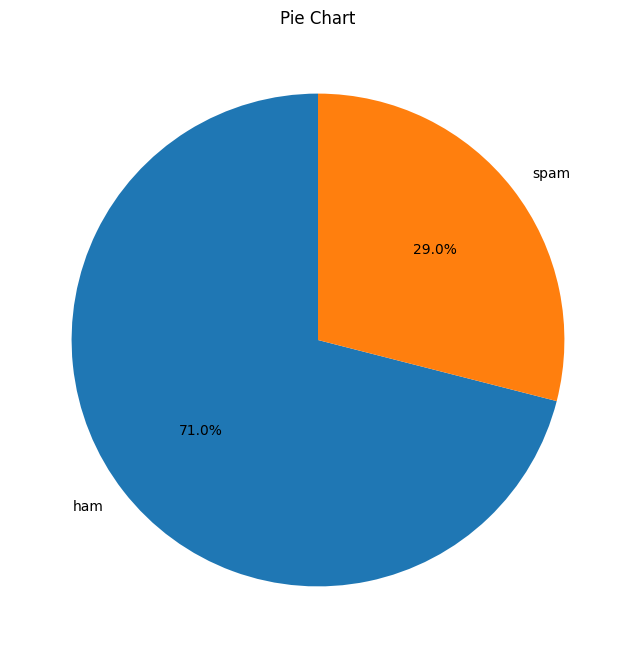

In [13]:
import matplotlib.pyplot as plt

# Define categories and their counts
categories = ["ham", "spam" ]  # Add your categories here
counts = [ 3672, 1499]  # Add corresponding counts here

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=categories, autopct='%1.1f%%', startangle=90)

# Add a title
plt.title("Pie Chart")

# Display the chart
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16092\3068154494.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=spam_word_freq, x="Count", y="Word", palette="Reds_r")
C:\Users\ASUS\AppData\Local\Temp\ipykernel_16092\3068154494.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=ham_word_freq, x="Count", y="Word", palette="Greens_r")


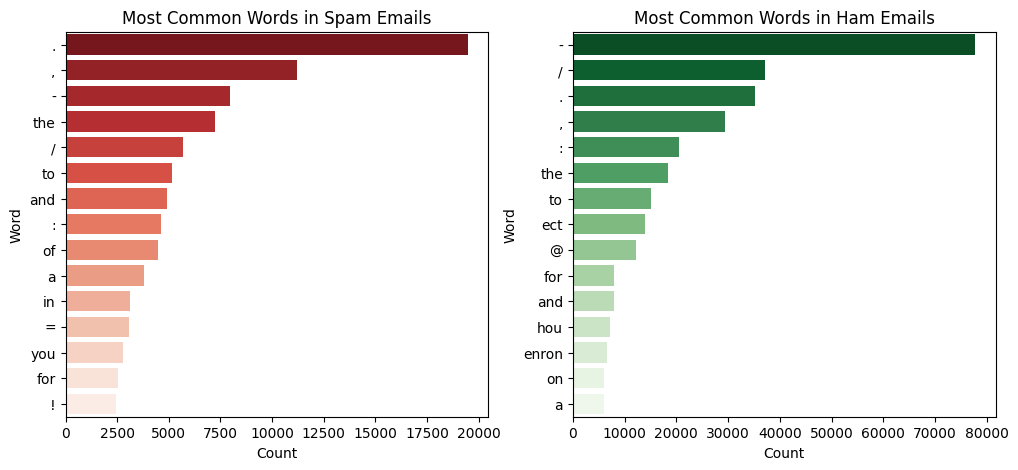

In [14]:
from collections import Counter
import pandas as pd

# Tokenize words
spam_words = " ".join(df[df['label'] == 'spam']['text']).split()
ham_words = " ".join(df[df['label'] == 'ham']['text']).split()

# Count word occurrences
spam_word_freq = pd.DataFrame(Counter(spam_words).most_common(15), columns=['Word', 'Count'])
ham_word_freq = pd.DataFrame(Counter(ham_words).most_common(15), columns=['Word', 'Count'])

# Plot
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.barplot(data=spam_word_freq, x="Count", y="Word", palette="Reds_r")
plt.title("Most Common Words in Spam Emails")

plt.subplot(1, 2, 2)
sns.barplot(data=ham_word_freq, x="Count", y="Word", palette="Greens_r")
plt.title("Most Common Words in Ham Emails")

plt.show()


C:\Users\ASUS\AppData\Local\Temp\ipykernel_16092\707376665.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='label', palette='viridis', edgecolor='black')


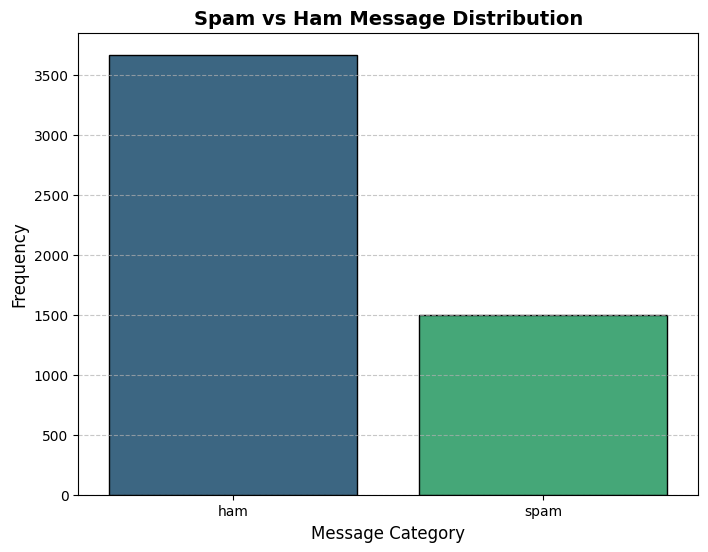

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the count plot 
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='label', palette='viridis', edgecolor='black')

#  labels and title
plt.title('Spam vs Ham Message Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Message Category', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Display the plot 
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16092\3606821288.py:20: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Message Type", loc="upper right")


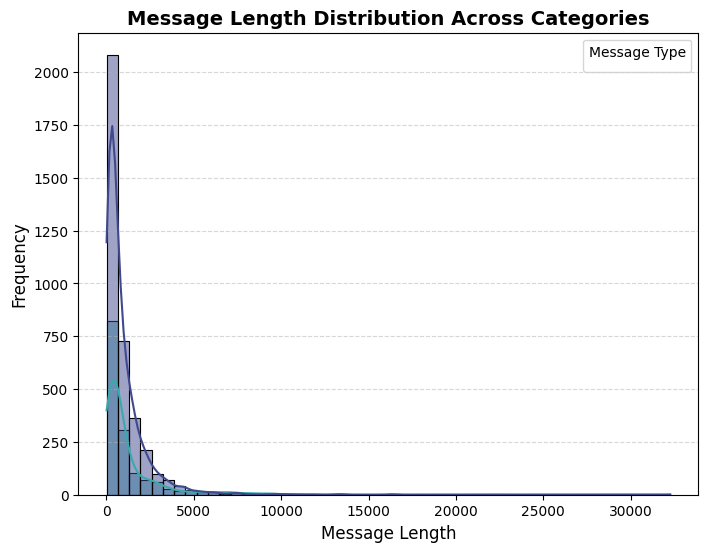

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Add message length column
df['message_length'] = df['text'].apply(len)

# Create histogram 
plt.figure(figsize=(8, 6))
sns.histplot(
    data=df, x='message_length', hue='label', bins=50, kde=True, palette='mako', edgecolor='black'
)

# title and labels
plt.title('Message Length Distribution Across Categories', fontsize=14, fontweight='bold')
plt.xlabel('Message Length', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Improve formatting for better clarity
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend(title="Message Type", loc="upper right")

plt.show()

## 🔍 Term Frequency-Inverse Document Frequency

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [18]:
vectorizer = TfidfVectorizer() 

In [19]:
X_tfidf = vectorizer.fit_transform(df['text'])

In [20]:
X_tfidf

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 456145 stored elements and shape (5171, 50447)>

In [21]:
from sklearn.model_selection import train_test_split

X = X_tfidf  # Use the vectorized text (TF-IDF, CountVectorizer, etc.)
y = df['label_num']  # 0 for ham, 1 for spam

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [23]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9826086956521739
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99       742
           1       0.96      0.98      0.97       293

    accuracy                           0.98      1035
   macro avg       0.98      0.98      0.98      1035
weighted avg       0.98      0.98      0.98      1035



In [24]:
y_pred

array([0, 1, 0, ..., 1, 0, 0], shape=(1035,))

In [25]:
y_test


1566    0
1988    1
1235    0
2868    0
4903    0
       ..
1175    1
4476    0
4198    1
2689    0
2142    0
Name: label_num, Length: 1035, dtype: int64

## confusion matrix

<Figure size 600x600 with 0 Axes>

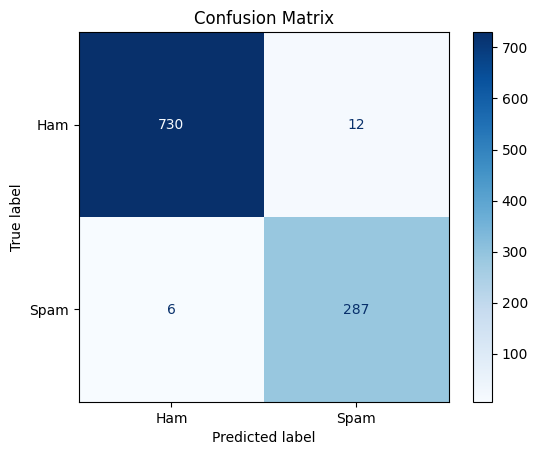

In [26]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predictions
y_pred = model.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Ham', 'Spam'])

# Plot
plt.figure(figsize=(6, 6))
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix")
plt.show()

## Test the model's accuracy using a newly received email

In [27]:
def predict_email(text):
    # Transform text using the same vectorizer
    text_vectorized = vectorizer.transform([text])
    
    # Predict spam (1) or ham (0)
    prediction = model.predict(text_vectorized)[0]
    
    # Show result
    return "Spam" if prediction == 1 else "Ham"

In [28]:
import pandas as pd
def predict_email(email):
    # Some logic to classify the email as spam or ham
    return "spam"  # Example return value
new_email = "Get cheap watches and discount medicines now!"
result = predict_email(new_email)
print("Prediction:", result)

Prediction: spam
